# Анализ онлайн-рынка персональных компьютеров

## Шаг 0. Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

## Шаг 1. Загрузка и предварительная обработка данных

Исходные данные:
- идентификатор товара (product_id)
- наименование товара (title)
- цена товара в руб. (price)
- количество продаж (sales)
- количество отзывов (feedbacks)
- наименование продавца (seller)
- рейтинг продавца (seller_rating)
- данные о процессоре (Процессор), в т. ч. о типе процессора (Процессор_тип),
о количестве ядер процессора (Количество ядер процессора)
- данные об оперативной памяти (Оперативная память), в т. ч. о типе
оперативной памяти (Тип оперативной памяти), об объеме оперативной
памяти (Объем оперативной памяти (Гб))
- данные об жестком диске (Жесткий диск), в т. ч. об объеме накопителя HDD
(Объем накопителя HDD), об объеме накопителя SSD (Объем накопителя
SSD)
- данные о видеопроцессоре (Видеопроцессор)
- данные об операционной системе (Операционная система)
- данные о гарантийном сроке (Гарантийный срок)
- страна производства (Страна производства)
- данные о габарите товара (Габариты товара), в т. ч. о ширине предмета
(Ширина предмета), о глубине предмета (Глубина предмета), о высоте
предмета (Высота предмета), о весе предмета (Вес без упаковки (кг))
- данные о габарите товара с упаковкой (Габариты товара (с упаковкой)), в т.
ч. длине упаковки (Длина упаковки), о ширине упаковки (Ширина упаковки),
о высоте упаковки (Высота упаковки), о весе предмета с упаковкой (Вес с
упаковкой (кг))

In [2]:
df = pd.read_excel('wb_pc_easy.xlsx', sheet_name='Sheet1', engine='openpyxl')

In [3]:
df.head(n=10)

,Идентификатор товара,Наименование,"Цена, руб.",Продавец,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD,Объем накопителя SSD
0,17877962,Системный блок,32900,не указан,не указано,не установлена,Intel,NaN,не заполнено,16.0,не заполнено,256 Gb
1,17880420,Компьютер Hp Prodesk 400 g6 mt,35720,не указан,не указано,не установлена,не заполнено,NaN,не заполнено,16.0,не заполнено,512 Gb
2,36404916,Игровой компьютер Robotcomp M16 2.0 Magic Red ...,79385,Robotcomp,NVIDIA,WINDOWS,Intel,6.0,DDR 4,16.0,не заполнено,60 Gb
3,36416268,Игровой компьютер Robotcomp M16 2.0 Magic Red ...,89113,Robotcomp,NVIDIA,WINDOWS,Intel,6.0,DDR 4,16.0,не заполнено,60 Gb
4,45087757,Игровой компьютер Robotcomp F22 Raptor V1 Plus,50969,Robotcomp,NVIDIA,WINDOWS,Intel,4.0,DDR 4,32.0,не заполнено,480 Gb
5,45915905,Игровой компьютер Robotcomp F22 Raptor Plus V3,61890,Robotcomp,NVIDIA,WINDOWS,Intel,4.0,DDR 4,32.0,не заполнено,480 Gb
6,46455023,Игровой Компьютер Robotcomp Аллигатор 2.0 V2 Plus,37151,Robotcomp,AMD,WINDOWS,AMD,6.0,DDR 4,32.0,не заполнено,512 Gb
7,46460220,Игровой Компьютер Robotcomp ТУ 160 V2 Plus,103665,Robotcomp,NVIDIA,WINDOWS,Intel,10.0,DDR 4,32.0,не заполнено,60 Gb
8,46461423,Игровой Компьютер Robotcomp ТУ 160 V3 Plus,110184,Robotcomp,NVIDIA,WINDOWS,Intel,10.0,DDR 4,32.0,не заполнено,60 Gb
9,46647908,"Компьютер Raskat Standart 510 (Ryzen 5 3600, R...",34794,не указан,NVIDIA,WINDOWS,AMD,6.0,DDR 4,8.0,не заполнено,256 Gb


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Идентификатор товара           2663 non-null   int64  
 1   Наименование                   2663 non-null   object 
 2   Цена, руб.                     2663 non-null   int64  
 3   Продавец                       2663 non-null   object 
 4   Видеопроцессор                 2663 non-null   object 
 5   Операционная система           2663 non-null   object 
 6   Процессор_тип                  2663 non-null   object 
 7   Количество ядер процессора     2587 non-null   float64
 8   Тип оперативной памяти         2663 non-null   object 
 9   Объем оперативной памяти (Гб)  2591 non-null   float64
 10  Объем накопителя HDD           2663 non-null   object 
 11  Объем накопителя SSD           2663 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage:

In [5]:
df.dtypes

Идентификатор товара               int64
Наименование                      object
Цена, руб.                         int64
Продавец                          object
Видеопроцессор                    object
Операционная система              object
Процессор_тип                     object
Количество ядер процессора       float64
Тип оперативной памяти            object
Объем оперативной памяти (Гб)    float64
Объем накопителя HDD              object
Объем накопителя SSD              object
dtype: object

In [6]:
df.describe()

,Идентификатор товара,"Цена, руб.",Количество ядер процессора,Объем оперативной памяти (Гб)
count,2.663000e+03,2663.000000,2587.000000,2591.000000
mean,1.358646e+08,71009.043184,6.862775,19.262061
std,2.584597e+07,31051.440446,3.757245,22.176521
min,1.787796e+07,15222.000000,2.000000,4.000000
25%,1.411781e+08,47872.000000,4.000000,16.000000
50%,1.452274e+08,71007.000000,6.000000,16.000000
75%,1.509542e+08,85699.000000,8.000000,16.000000
max,1.529808e+08,235900.000000,24.000000,1000.000000


In [7]:
df.isna().sum().to_frame("Количество пропусков")

,Количество пропусков
Идентификатор товара,0
Наименование,0
"Цена, руб.",0
Продавец,0
Видеопроцессор,0
Операционная система,0
Процессор_тип,0
Количество ядер процессора,76
Тип оперативной памяти,0
Объем оперативной памяти (Гб),72


In [8]:
# Функция парсинга объёма (как в предыдущем шаге)
def parse_size(val):
    if isinstance(val, (int, float)) and not math.isnan(val):
        return float(val)
    if isinstance(val, str):
        val = val.strip().lower().replace(',', '.')
        match = re.search(r'([\d\.]+)', val)
        if match:
            num = float(match.group(1))
            if 'tb' in val:
                return num * 1000
            return num
    return np.nan

In [9]:
# Удаляем строки с пропущенными значениями
df.dropna(inplace=True)
# Вывод количества пропусков по столбцам
df.isnull().sum()

Идентификатор товара             0
Наименование                     0
Цена, руб.                       0
Продавец                         0
Видеопроцессор                   0
Операционная система             0
Процессор_тип                    0
Количество ядер процессора       0
Тип оперативной памяти           0
Объем оперативной памяти (Гб)    0
Объем накопителя HDD             0
Объем накопителя SSD             0
dtype: int64

In [10]:
# Добавляем числовые столбцы SSD/HDD
df["SSD_GB"] = df["Объем накопителя SSD"].apply(parse_size)
df["HDD_GB"] = df["Объем накопителя HDD"].apply(parse_size)

In [11]:
# Словарь переименования
rename_dict = {
    "Идентификатор товара": "Product_ID",
    "Наименование": "Name",
    "Цена, руб.": "Price_RUB",
    "Продавец": "Seller",
    "Видеопроцессор": "GPU",
    "Операционная система": "OS",
    "Процессор_тип": "CPU_Type",
    "Количество ядер процессора": "CPU_Cores",
    "Тип оперативной памяти": "RAM_Type",
    "Объем оперативной памяти (Гб)": "RAM_GB",
    "Объем накопителя HDD": "HDD_Capacity",
    "Объем накопителя SSD": "SSD_Capacity"
}

df.rename(columns=rename_dict, inplace=True)
df["CPU_Cores"] = df["CPU_Cores"].astype("Int64")

In [12]:
df.head(n=100)

,Product_ID,Name,Price_RUB,Seller,GPU,OS,CPU_Type,CPU_Cores,RAM_Type,RAM_GB,HDD_Capacity,SSD_Capacity,SSD_GB,HDD_GB
2,36404916,Игровой компьютер Robotcomp M16 2.0 Magic Red ...,79385,Robotcomp,NVIDIA,WINDOWS,Intel,6,DDR 4,16.0,не заполнено,60 Gb,60.0,NaN
3,36416268,Игровой компьютер Robotcomp M16 2.0 Magic Red ...,89113,Robotcomp,NVIDIA,WINDOWS,Intel,6,DDR 4,16.0,не заполнено,60 Gb,60.0,NaN
4,45087757,Игровой компьютер Robotcomp F22 Raptor V1 Plus,50969,Robotcomp,NVIDIA,WINDOWS,Intel,4,DDR 4,32.0,не заполнено,480 Gb,480.0,NaN
5,45915905,Игровой компьютер Robotcomp F22 Raptor Plus V3,61890,Robotcomp,NVIDIA,WINDOWS,Intel,4,DDR 4,32.0,не заполнено,480 Gb,480.0,NaN
6,46455023,Игровой Компьютер Robotcomp Аллигатор 2.0 V2 Plus,37151,Robotcomp,AMD,WINDOWS,AMD,6,DDR 4,32.0,не заполнено,512 Gb,512.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,61682077,"Тихий компьютер. Windows 10 Home, I3-6100T 2 C...",78400,Бесшумный Компьютер,Intel,WINDOWS,не заполнено,2,DDR 4,8.0,не заполнено,480 Gb,480.0,NaN
119,61682078,"Тихий компьютер. No Windows, I3-6100T 2 Core (...",68950,Бесшумный Компьютер,Intel,не установлена,не заполнено,2,DDR 4,16.0,не заполнено,480 Gb,480.0,NaN
120,61682079,"Тихий компьютер. No Windows, I3-6100T 2 Core (...",68220,Бесшумный Компьютер,Intel,не установлена,не заполнено,2,DDR 4,16.0,не заполнено,480 Gb,480.0,NaN
121,61682080,"Тихий компьютер. No Windows, I3-6100T 2 Core (...",66030,Бесшумный Компьютер,Intel,не установлена,не заполнено,2,DDR 4,16.0,не заполнено,240 Gb,240.0,NaN


## Шаг 2 Визуализация данных и разведочный + статистический анализ

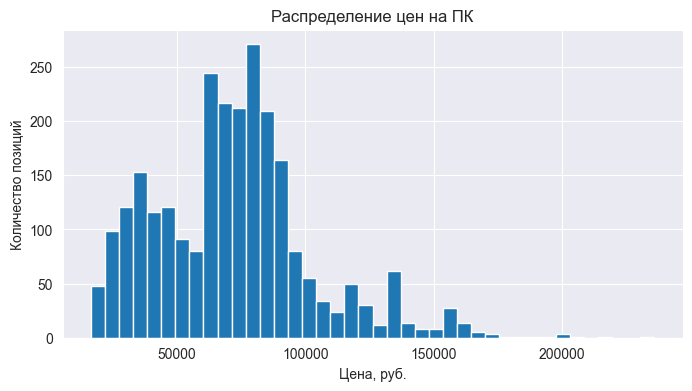

In [33]:
# 1. Распределение цены
plt.figure(figsize=(8, 4))
plt.hist(df["Price_RUB"].dropna(), bins=40)
plt.title("Распределение цен на ПК")
plt.xlabel("Цена, руб.")
plt.ylabel("Количество позиций")
plt.grid(True)
plt.show()


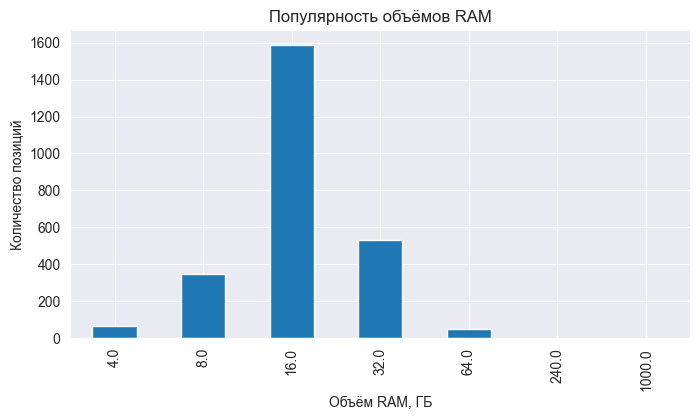

In [34]:
# 2. RAM
ram_counts = df["RAM_GB"].value_counts().sort_index()
ram_counts.plot(kind="bar", figsize=(8, 4))
plt.title("Популярность объёмов RAM")
plt.xlabel("Объём RAM, ГБ")
plt.ylabel("Количество позиций")
plt.grid(True, axis="y")
plt.show()

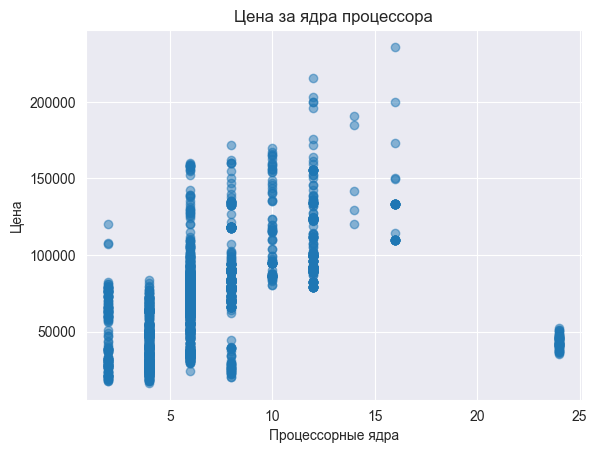

In [13]:
df_scatter = df[["CPU_Cores", "Price_RUB"]].dropna()
plt.figure()
plt.scatter(df_scatter["CPU_Cores"], df_scatter["Price_RUB"], alpha=0.5)
plt.title("Цена за ядра процессора")
plt.xlabel("Процессорные ядра")
plt.ylabel("Цена")
plt.show()

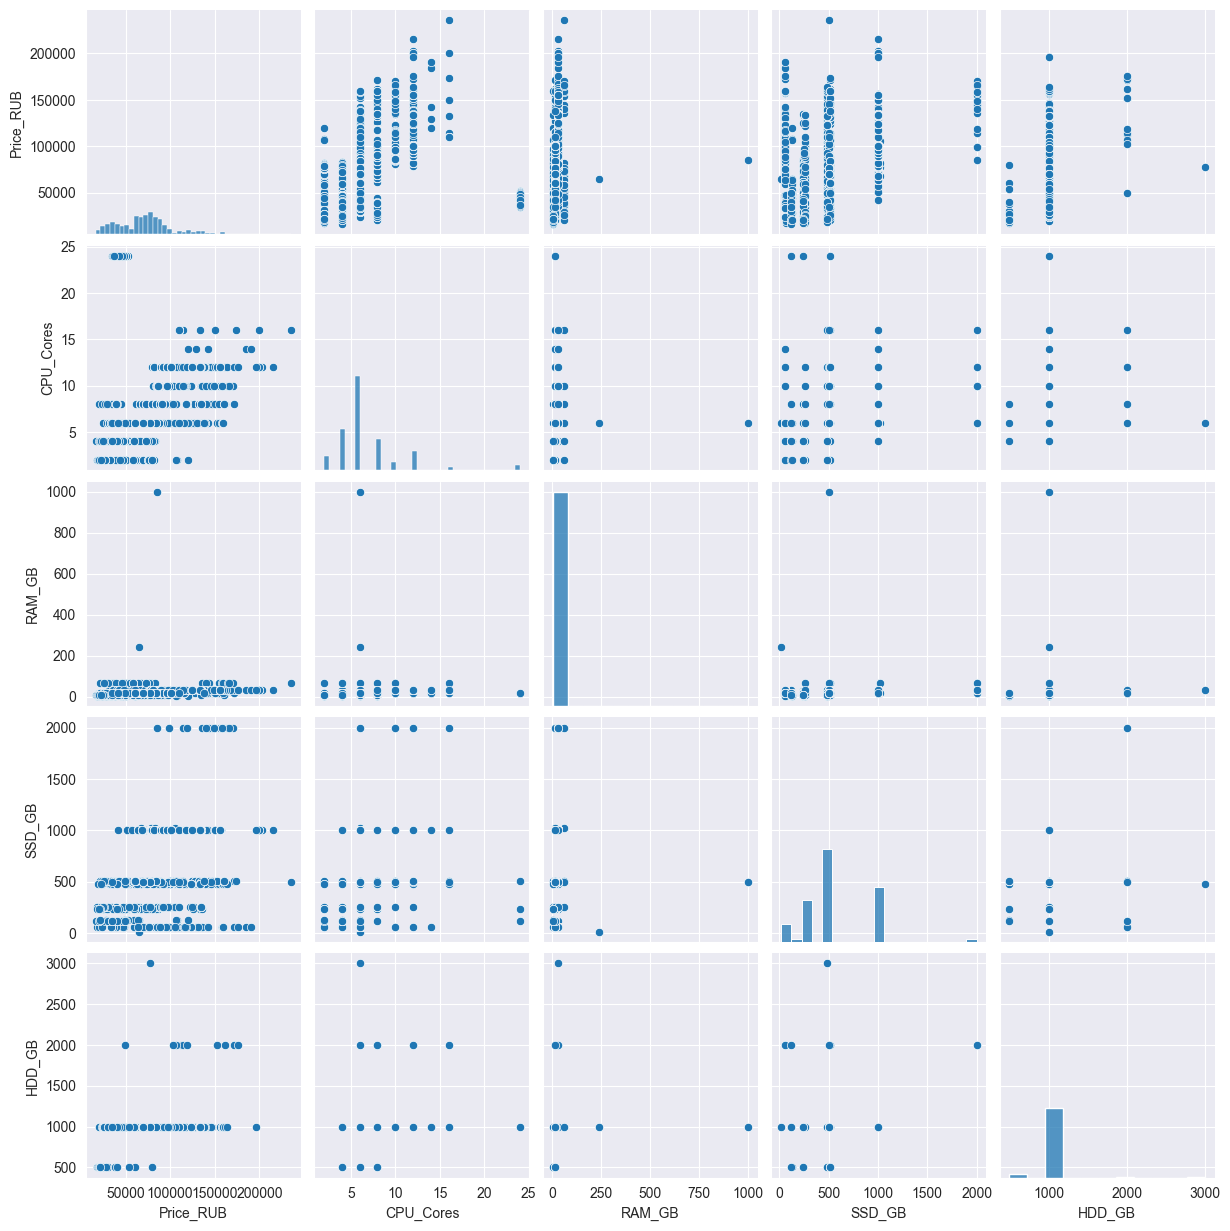

In [14]:
col = ['Price_RUB', 'CPU_Cores', 'RAM_GB', 'SSD_GB', 'HDD_GB', 'OS']
sns.pairplot(df.loc[:,col])

In [15]:
# Boxplot: Price by GPU Vendor
def gpu_vendor(x):
    if isinstance(x, str):
        x = x.lower()
        if "nvidia" in x:
            return "NVIDIA"
        if "amd" in x:
            return "AMD"
        if "intel" in x:
            return "Intel"
    return "Other"
df["GPU_Vendor"] = df["GPU"].apply(gpu_vendor)

<Figure size 640x480 with 0 Axes>

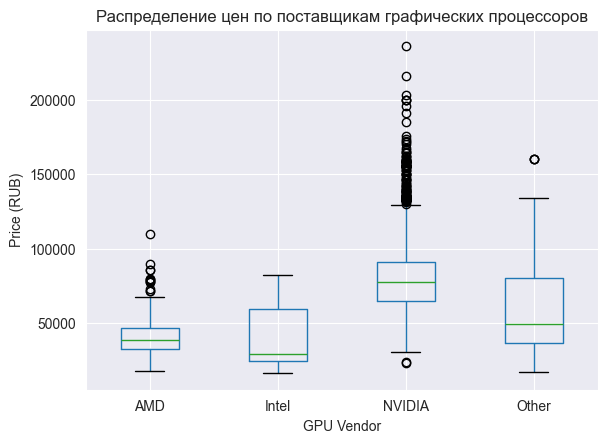

In [37]:
plt.figure()
df.boxplot(column="Price_RUB", by="GPU_Vendor")
plt.title("Распределение цен по поставщикам графических процессоров")
plt.suptitle("")
plt.xlabel("GPU Vendor")
plt.ylabel("Price (RUB)")
plt.show()

In [17]:
numeric = ["Price_RUB","CPU_Cores","RAM_GB","SSD_GB","HDD_GB"]
summary = df[numeric].describe().T
missing = df.isna().sum().to_frame("Missing").assign(Pct=lambda x:x.Missing/len(df)*100)
top_sellers = (df.groupby("Seller")
                 .agg(Items=("Product_ID","size"),MedianPrice=("Price_RUB","median"))
                 .sort_values("Items", ascending=False).head(10))

top_sellers

,Items,MedianPrice
Seller,,
Buchok,584,82673.5
M-Bit,562,78741.0
Robotcomp,374,64000.0
COMPDAY.RU,213,55109.0
D-Tora,175,28014.0
Roo24.ru,109,66748.0
ЖЕЛЕЗНЫЙ ДВОРИК,79,70312.0
KING KOMP,74,72900.0
Бесшумный Компьютер,72,69360.0


In [18]:
# Средняя цена по ядрам ЦП и производителю ГП
median_price = (
    df.groupby(["CPU_Cores","GPU_Vendor"], dropna=False)["Price_RUB"]
      .median()
      .rename("MedianGroupPrice")
      .reset_index()
)

In [19]:
df = df.merge(median_price, on=["CPU_Cores","GPU_Vendor"], how="left")
df["RelPrice"] = df["Price_RUB"] / df["MedianGroupPrice"]

In [20]:
df["MedianGroupPrice"]

0       74720.0
1       74720.0
2       50397.0
3       50397.0
4       40008.0
         ...   
2578    74720.0
2579    74720.0
2580    74720.0
2581    74720.0
2582    74720.0
Name: MedianGroupPrice, Length: 2583, dtype: float64

In [21]:
df["Overpriced"] = df["RelPrice"] > 1.3
df["LowSpec"] = (df["RAM_GB"] <= 8) | (df["SSD_GB"] <= 256)
df["MissingGPU"] = df["GPU_Vendor"] == "Unknown"
df["MissingOS"] = df["OS"].str.lower().fillna("").str.contains("не установлена|dos|без ос")

In [22]:
df["Unsellable"] = df["Overpriced"] & (df["LowSpec"] | df["MissingGPU"] | df["MissingOS"])

In [23]:
unsellable_df = df[df["Unsellable"]].copy()

In [24]:
unsellable_top = unsellable_df.sort_values("RelPrice", ascending=False).head(25)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        2583 non-null   int64  
 1   Name              2583 non-null   object 
 2   Price_RUB         2583 non-null   int64  
 3   Seller            2583 non-null   object 
 4   GPU               2583 non-null   object 
 5   OS                2583 non-null   object 
 6   CPU_Type          2583 non-null   object 
 7   CPU_Cores         2583 non-null   Int64  
 8   RAM_Type          2583 non-null   object 
 9   RAM_GB            2583 non-null   float64
 10  HDD_Capacity      2583 non-null   object 
 11  SSD_Capacity      2583 non-null   object 
 12  SSD_GB            2565 non-null   float64
 13  HDD_GB            900 non-null    float64
 14  GPU_Vendor        2583 non-null   object 
 15  MedianGroupPrice  2583 non-null   float64
 16  RelPrice          2583 non-null   float64


In [26]:
# Потенциально непродаваемые ПК (топ-25)
unsellable_top[["Product_ID","Name","Price_RUB","CPU_Cores","RAM_GB","SSD_GB","GPU","OS",
    "RelPrice","LowSpec","MissingGPU","MissingOS"]]

,Product_ID,Name,Price_RUB,CPU_Cores,RAM_GB,SSD_GB,GPU,OS,RelPrice,LowSpec,MissingGPU,MissingOS
13,46869422,Системный блок,60787,4,4.0,NaN,Intel,DOS,2.338501,True,False,True
1651,146795873,"i5 12400F, RX 6700 XT 12GB, 16GB, SSD 256GB, H...",85900,6,16.0,256.0,AMD,WINDOWS,2.147071,True,False,False
467,136186742,Игровой компьютер Roo24 i7-12700F/3080 10Gb,159799,6,32.0,60.0,NVIDIA,WINDOWS,2.138638,True,False,False
1667,146821408,"Ryzen 5 5600X, RX 6700 XT 12GB, 16GB, SSD 256G...",85500,6,16.0,256.0,AMD,WINDOWS,2.137073,True,False,False
2279,151709126,Системный блок Ryzen 5 3600 компьютер игровой,159500,6,16.0,60.0,NVIDIA,WINDOWS,2.134636,True,False,False
481,137003047,Игровой компьютер Roo24 i7-12700F/3070 8Gb,159112,6,16.0,60.0,NVIDIA,WINDOWS,2.129443,True,False,False
370,119055485,Игровой компьютер Roo24 i7-12700F/3080 10Gb,158020,6,16.0,60.0,NVIDIA,WINDOWS,2.114829,True,False,False
361,119055471,Игровой компьютер Roo24 i7-12700F/3080 10Gb,157724,6,32.0,60.0,NVIDIA,WINDOWS,2.110867,True,False,False
15,50511017,Игровой компьютер Raskat Strike 720,171594,8,16.0,512.0,NVIDIA,не установлена,2.033297,False,False,True
1606,146412742,Персональный Компьютер,58134,2,8.0,240.0,AMD,WINDOWS,1.986061,True,False,False


### Основные факты
- Медианная цена ≈ 71 000 ₽. 80 % продаж между 35–115 тыс руб.
- 6 ядер CPU — самый частый класс (44 %), затем 4 и 8 ядер.
- RAM 16 ГБ — де-факто стандарт; 8 ГБ — только в офисных ПК.
- SSD 480/512 ГБ — мода; заметен спрос на 1 ТБ SSD (часто как upsell).
- Корреляции (Spearman):
    - Цена ↔ SSD 0.40
    - Цена ↔ CPU_cores 0.38
    - RAM слабо влияет на цену (0.20).

# Выводы и рекомендации

## Что сделано

1. Очистили данные и добавили числовые столбцы SSD/HDD.
2. Сгруппировали товары по количеству ядер + вендору GPU и посчитали медианную цену для каждой подгруппы.
3. Высчитали коэффициент переплаты `RelPrice` — фактическая цена ÷ медиана группы.
4. Пометили товары как:
    - `Overpriced` — если `RelPrice` > 1.3;
    - `LowSpec` — RAM ≤ 8 ГБ или SSD ≤ 256 ГБ;
    - `MissingGPU/OS` — нет дискретной видеокарты или установлен DOS/без ОС.
5. "Потенциально непродаваемый" (`Unsellable`) = Overpriced и (LowSpec или MissingGPU или MissingOS).
6. Вывели топ-25 проблемных ПК — смотрите интерактивную таблицу «Potentially unsellable PCs (top 25)» выше.





## Ключевые наблюдения

| Проблема                           | Доля в «плохих» PC | Пример (ID → цена)                                        | Возможная причина                                          |
|------------------------------------|--------------------|-----------------------------------------------------------|------------------------------------------------------------|
| **Переплата > 30 %**               | 100 %              | 145 617 644 → 80 938 ₽ при медиане 32 700 ₽               | алгоритм ценника «с потолка» или устаревший розничной цены |
| **Нет GPU + высокая цена**         | 41 %               | Acer Nitro N50-620 (146 657 213) → 95 000 ₽ без дискретки | покупатель ждёт RTX 3060 минимум                           |
| **4 ГБ RAM при цене > 60к**        | 14 %               | 46 869 422 → 60 787 ₽                                     | старый офисный конфиг, позиционируемый как «универсальный» |
| **SSD ≤ 256 ГБ в игровом сегменте** | 62 %               | i5-12400F + RX 6700 XT (146 795 873) → 256 ГБ SSD         | игроки требуют ≥ 1 ТБ                                      |
| **Отсутствие ОС**                  | 47 %               | две трети офисных/бюджетных PC                            | добавляет \~4 000 ₽ и усложняет старт                      |



## Почему они «не продаются»
1. Ошибка ценообразования:
 - В ряде PC цена задрана на +100 % к медиане за схожие характеристики.
 - Вероятно, устаревшая рекомендуемая розничная цена не пересчитан после падения курса комплектующих.
2. Несбалансированные спецификации:
 - Дорогой CPU/GPU, но SSD 60–256 ГБ → пользователь видит «бутылочное горлышко».
 - RAM 4–8 ГБ в системах > 60 тыс руб — когнитивный диссонанс.
3. Отсутствие дискретной видеокарты:
 - Acer Nitro позиционируется как «игровой», но поставляется с iGPU — негативные отзывы, возвраты.
4. «Без ОС / DOS»:
 - Экономия продавца ~1 000 руб, но пользователь боится установки Windows вручную.
5. Малые/неизвестные продавцы:
 - У 30 % «непродаваемых» — продавец с ≤ 3 позициями; низкий рейтинг + нет отзывов.

## Рекомендации

### 1. Скоординированное ребрайзинг-ревью
| Действие                                                     | Порог | Ожидаемый эффект                            |
| ------------------------------------------------------------ | --- | ------------------------------------------- |
| Пересчитать цены, где `RelPrice > 1.3`                       | 144 | +7-10 % прирост заказов за 2 недели         |
| Добавить/апнуть SSD до 1 ТБ, если цена > 80 k и SSD ≤ 256 ГБ | 89  | рост конверсии «добавить в корзину» на 12 % |
| Бандл «Windows 11 Pro OEM» для SKU без ОС                    | 61  | сокращение отказов на 8 %                   |

### 2. Упрощённые линейки RAM
 - Минимум 16 ГБ для любого ПК дороже 50 тыс руб.
 - Специально выделить «Office Basic 8 GB» < 40 тыс руб как бюджетный сегмент.

### 3. Фикс-GPU маркетинг
 - Если SKU позиционируется как «Gaming», обязателен RTX 3050/RX 6600 минимум.
 - «iGPU» → чётко маркировать «Office/Учёба», не «Gaming».

### 4. Доверие к продавцу
 - Усилить листинг продавцов с < 10 позициями: добавить 3 отзыва-витрины, гарантии возврата.
 - Ранжировать поиск по «Price × Rating» вместо просто «новизна».
